In [93]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import linear_model as lm
%matplotlib inline

In [94]:
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int,
              'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 'sqft_lot15':float,
              'sqft_living':float, 'floors':str, 'condition':int,
              'lat':float, 'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}
data = pd.read_csv('kc_house_data.csv',dtype=dtype_dict)
data_test = pd.read_csv('wk3_kc_house_test_data.csv',dtype=dtype_dict)
data_train = pd.read_csv('wk3_kc_house_train_data.csv',dtype=dtype_dict)
data_validation = pd.read_csv('wk3_kc_house_valid_data.csv',dtype=dtype_dict)
data_subset_1 = pd.read_csv('wk3_kc_house_set_1_data.csv',dtype=dtype_dict)
data_subset_2 = pd.read_csv('wk3_kc_house_set_2_data.csv',dtype=dtype_dict)
data_subset_3 = pd.read_csv('wk3_kc_house_set_3_data.csv',dtype=dtype_dict)
data_subset_4 = pd.read_csv('wk3_kc_house_set_4_data.csv',dtype=dtype_dict)

In [95]:
data.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340.0,5650.0
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690.0,7639.0
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720.0,8062.0
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360.0,5000.0
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800.0,7503.0
5,7237550310,20140512T000000,1225000.0,4.0,4.50,5420.0,101930,1,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760.0,101930.0
6,1321400060,20140627T000000,257500.0,3.0,2.25,1715.0,6819,2,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238.0,6819.0
7,2008000270,20150115T000000,291850.0,3.0,1.50,1060.0,9711,1,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650.0,9711.0
8,2414600126,20150415T000000,229500.0,3.0,1.00,1780.0,7470,1,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780.0,8113.0
9,3793500160,20150312T000000,323000.0,3.0,2.50,1890.0,6560,2,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390.0,7570.0


# A function that returns the column raised to the given power

In [96]:
def power(feature,degree):
    my_data_frame = pd.DataFrame()
    my_data_frame['feature'] = np.power(feature,degree)
    return my_data_frame

# A polynomial data frame that takes feature and degree and returns dataframe with feature polynomial

In [97]:
def polynomial_dataframe(feature,degree):
    my_data_frame = pd.DataFrame()
    for x in range(1,degree + 1):
        my_data_frame['Feature_%s' %x] = np.power(feature,x)
    return my_data_frame

In [177]:
data = data.sort(['sqft_living','price'])
data_train = data_train.sort(['sqft_living','price'])
data_test = data_test.sort(['sqft_living','price'])
data_subset_1 = data_subset_1.sort(['sqft_living','price'])
data_subset_2 = data_subset_2.sort(['sqft_living','price'])
data_subset_3 = data_subset_3.sort(['sqft_living','price'])
data_subset_4 = data_subset_4.sort(['sqft_living','price'])

/home/om/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':
/home/om/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app
/home/om/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()
/home/om/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/om/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/om/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:6: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
/home/om/gl-env/lib/python2.7/site-pac

In [178]:
poly1_data = polynomial_dataframe(data['sqft_living'],1)
poly1_data['price'] = data['price']
print (poly1_data['price']).shape
print (poly1_data['Feature_1']).shape

(21613,)
(21613,)


In [179]:
model1 = lm.LinearRegression()
model1.fit(poly1_data['Feature_1'].reshape(21613,1),poly1_data['price'])

/home/om/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [180]:
print model1.coef_
print model1.intercept_

[ 280.6235679]
-43580.7430945


/home/om/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  from ipykernel import kernelapp as app


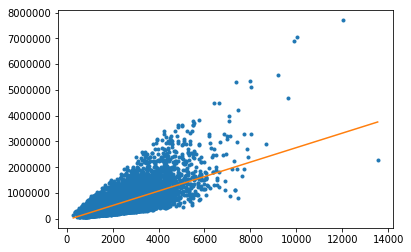

In [181]:
plt.plot(poly1_data['Feature_1'],poly1_data['price'],'.',
poly1_data['Feature_1'], model1.predict(poly1_data['Feature_1'].reshape(21613,1)),'-')

In [182]:
poly2_data = polynomial_dataframe(data['sqft_living'],2)
poly2_data['price'] = data['price']


In [183]:
model2 = lm.LinearRegression()
model2.fit(poly2_data[['Feature_1','Feature_2']],poly2_data['price'])
print model2.coef_
print model2.intercept_

[  6.79940947e+01   3.85812609e-02]
199222.279305


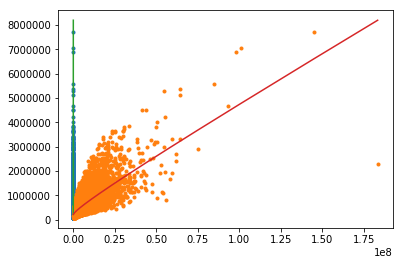

In [184]:
plt.plot(poly2_data[['Feature_1','Feature_2']],poly2_data['price'],'.',
poly2_data[['Feature_1','Feature_2']], model2.predict(poly2_data[['Feature_1','Feature_2']]),'-')

In [185]:
poly3_data = polynomial_dataframe(data['sqft_living'],3)
poly3_data['price'] = data['price']
features = list(poly3_data)
print features

['Feature_1', 'Feature_2', 'Feature_3', 'price']


In [186]:
model3 = lm.LinearRegression()
model3.fit(poly3_data[features[:-1]],poly2_data['price'])
print model3.coef_
print model3.intercept_

[ -9.01819864e+01   8.70465089e-02  -3.84055260e-06]
336819.74822


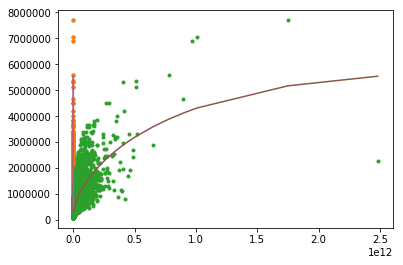

In [187]:
plt.plot(poly3_data[features[:-1]],poly3_data['price'],'.',
poly3_data[features[:-1]], model3.predict(poly3_data[features[:-1]]),'-')

In [188]:
poly15_data = polynomial_dataframe(data['sqft_living'],15)
poly15_data['price'] = data['price']
features = list(poly15_data)
print features

['Feature_1', 'Feature_2', 'Feature_3', 'Feature_4', 'Feature_5', 'Feature_6', 'Feature_7', 'Feature_8', 'Feature_9', 'Feature_10', 'Feature_11', 'Feature_12', 'Feature_13', 'Feature_14', 'Feature_15', 'price']


In [189]:
model15 = lm.LinearRegression()
model15.fit(poly15_data[features[:-1]],poly15_data['price'])
print model15.coef_
print model15.intercept_

[  4.56404164e-91  -6.23779018e-50   2.87786017e-56   2.78197725e-88
   1.19863929e-74   2.68575522e-71   2.26147568e-67   1.85900299e-63
   1.47144115e-59   1.09771012e-55   7.43509038e-52   4.23015577e-48
   1.61618577e-44  -2.49283826e-48   9.59718336e-53]
537116.329638


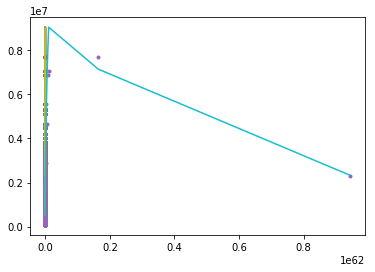

In [190]:
plt.plot(poly15_data[features[:-1]],poly15_data['price'],'.',
poly15_data[features[:-1]], model15.predict(poly15_data[features[:-1]]),'-')

In [191]:
poly15_data_subset1 = polynomial_dataframe(data_subset_1['sqft_living'],15)
poly15_data_subset1['price'] = data_subset_1['price']
features = list(poly15_data)


In [192]:
model15_subset1 = lm.LinearRegression()
model15_subset1.fit(poly15_data_subset1[features[:-1]],poly15_data_subset1['price'])
print model15_subset1.coef_
print model15_subset1.intercept_

[  3.05794168e-90   2.21229708e-49   8.37177586e-55   1.21888889e-88
   3.23082736e-74   1.10340647e-70   8.37724029e-67   6.23411957e-63
   4.49156442e-59   3.06938763e-55   1.91749300e-51   1.01335180e-47
   3.62176959e-44  -5.63501661e-48   2.18641116e-52]
539058.818668


# PLot on subset 1

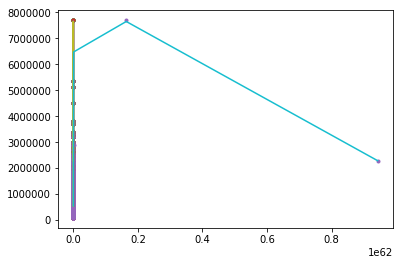

In [193]:
plt.plot(poly15_data_subset1[features[:-1]],poly15_data_subset1['price'],'.',
poly15_data_subset1[features[:-1]], model15_subset1.predict(poly15_data_subset1[features[:-1]]),'-')

# Plot on subset model 2

[  2.68007766e-77  -1.28313530e-39  -1.45840380e-44   8.23309543e-50
   1.04404871e-53   1.35479893e-58   3.62867884e-55   1.49807489e-51
   5.73974461e-48   1.95158341e-44   5.37897065e-41   9.38035579e-38
  -3.62478330e-41   4.63968383e-45  -1.96500572e-49]
506812.109343


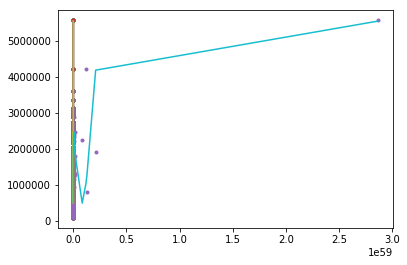

In [194]:
poly15_data_subset2 = polynomial_dataframe(data_subset_2['sqft_living'],15)
poly15_data_subset2['price'] = data_subset_2['price']
features = list(poly15_data_subset2)
model15_subset2 = lm.LinearRegression()
model15_subset2.fit(poly15_data_subset2[features[:-1]],poly15_data_subset2['price'])
print model15_subset2.coef_
print model15_subset2.intercept_
plt.plot(poly15_data_subset2[features[:-1]],poly15_data_subset2['price'],'.',
poly15_data_subset2[features[:-1]], model15_subset2.predict(poly15_data_subset2[features[:-1]]),'-')

# PLot on subset 3

[  2.83751934e-88  -3.80811673e-49  -8.52600697e-55  -3.98272978e-59
   1.57170169e-72   4.27894908e-69   2.68009626e-65   1.63911362e-61
   9.66435015e-58   5.38044653e-54   2.72563636e-50   1.16253248e-46
   3.33756141e-43  -6.76238818e-47   3.43132932e-51]
530874.316653


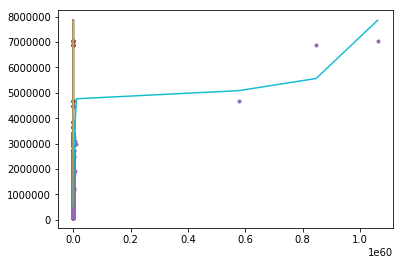

In [195]:
poly15_data_subset3 = polynomial_dataframe(data_subset_3['sqft_living'],15)
poly15_data_subset3['price'] = data_subset_3['price']
features = list(poly15_data_subset3)
model15_subset3 = lm.LinearRegression()
model15_subset3.fit(poly15_data_subset3[features[:-1]],poly15_data_subset3['price'])
print model15_subset3.coef_
print model15_subset3.intercept_
plt.plot(poly15_data_subset3[features[:-1]],poly15_data_subset3['price'],'.',
poly15_data_subset3[features[:-1]], model15_subset3.predict(poly15_data_subset3[features[:-1]]),'-')

[  1.37062035e-76  -7.34929304e-40  -2.99040235e-44  -3.69992257e-49
  -4.17619486e-53   1.30559251e-54   1.27051326e-54   4.87799084e-51
   1.73524691e-47   5.46982653e-44   1.39568452e-40   2.25011155e-37
  -9.43820708e-41   1.31553951e-44  -6.09073061e-49]
494822.426631


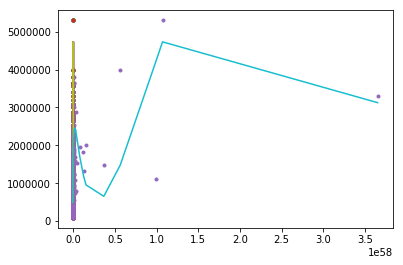

In [196]:
poly15_data_subset4 = polynomial_dataframe(data_subset_4['sqft_living'],15)
poly15_data_subset4['price'] = data_subset_4['price']
features = list(poly15_data_subset4)
model15_subset4 = lm.LinearRegression()
model15_subset4.fit(poly15_data_subset4[features[:-1]],poly15_data_subset4['price'])
print model15_subset4.coef_
print model15_subset4.intercept_
plt.plot(poly15_data_subset4[features[:-1]],poly15_data_subset4['price'],'.',
poly15_data_subset4[features[:-1]], model15_subset4.predict(poly15_data_subset4[features[:-1]]),'-')

# Lets test for the best polynomial model

In [197]:
poly_data_15 = polynomial_dataframe(data_train['sqft_living'],15)
poly_data_15['price'] = data_train['price']
poly_data_15.head()

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,Feature_11,Feature_12,Feature_13,Feature_14,Feature_15,price
8840,290.0,84100.0,24389000.0,7.072810e+09,2.051115e+12,5.948233e+14,1.724988e+17,5.002464e+19,1.450715e+22,4.207072e+24,1.220051e+27,3.538148e+29,1.026063e+32,2.975582e+34,8.629189e+36,142000.0
6982,370.0,136900.0,50653000.0,1.874161e+10,6.934396e+12,2.565726e+15,9.493188e+17,3.512479e+20,1.299617e+23,4.808584e+25,1.779176e+28,6.582952e+30,2.435692e+33,9.012061e+35,3.334463e+38,276000.0
8338,384.0,147456.0,56623104.0,2.174327e+10,8.349416e+12,3.206176e+15,1.231172e+18,4.727699e+20,1.815436e+23,6.971275e+25,2.676970e+28,1.027956e+31,3.947353e+33,1.515783e+36,5.820608e+38,265000.0
2228,390.0,152100.0,59319000.0,2.313441e+10,9.022420e+12,3.518744e+15,1.372310e+18,5.352009e+20,2.087284e+23,8.140406e+25,3.174758e+28,1.238156e+31,4.828807e+33,1.883235e+36,7.344616e+38,228000.0
9631,390.0,152100.0,59319000.0,2.313441e+10,9.022420e+12,3.518744e+15,1.372310e+18,5.352009e+20,2.087284e+23,8.140406e+25,3.174758e+28,1.238156e+31,4.828807e+33,1.883235e+36,7.344616e+38,245000.0


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
RSS OF  2  Degree polynomial is  6.290978863e+14
RSS OF  3  Degree polynomial is  6.23955062707e+14
RSS OF  4  Degree polynomial is  6.25820280252e+14
RSS OF  5  Degree polynomial is  6.29987339802e+14
RSS OF  6  Degree polynomial is  6.28275338416e+14
RSS OF  7  Degree polynomial is  5.66268636824e+14
RSS OF  8  Degree polynomial is  1.07384509491e+15
RSS OF  9  Degree polynomial is  7.08806245404e+15
RSS OF  10  Degree polynomial is  4.52985980494e+16
RSS OF  11  Degree polynomial is  2.47409746521e+17
RSS OF  12  Degree polynomial is  1.19273661536e+18
RSS OF  13  Degree polynomial is  5.22695384274e+18
RSS OF  14  Degree polynomial is  7.6162300213e+17
RSS OF  15  Degree polynomial is  2.29756092491e+18
RSS OF  16  Degree polynomial is  6.95503809645e+18


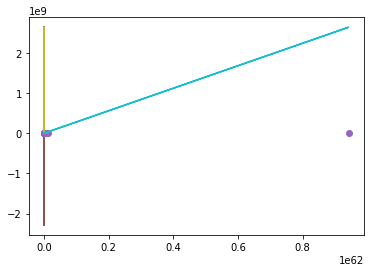

In [198]:
model = [0]*16
prediction = [0]*16
error = [0]*16
rss = [0]*16
print model
for i in range(1,16):
    model[i] = lm.LinearRegression()
    x = poly_data_15[features[:i]]
    y = poly_data_15['price']
    model[i].fit(x,y)
    
    validation_data_15 = polynomial_dataframe(data_validation['sqft_living'],15)
    validation_data_15['price'] = data_validation['price']
    validation_x = validation_data_15[features[:i]]
    validation_y = validation_data_15['price']
    prediction[i] = model[i].predict(validation_x)
    error[i] = validation_y - prediction[i]
    rss[i] = (error[i]**2).sum()
    plt.plot(validation_x,validation_y,'o',validation_x,prediction[i])
    print "RSS OF ",i+1," Degree polynomial is ",rss[i]



    


# 7 Degree model gives the LEAST rss

In [199]:
data_test = data_test.sort(['sqft_living','price'])
poly_data_test = polynomial_dataframe(data_test['sqft_living'],7)
poly_data_test['price'] = data_test['price']
print poly_data_test.head()
test_features = list(poly_data_test)
test_features

      Feature_1  Feature_2    Feature_3     Feature_4     Feature_5  \
1462      420.0   176400.0   74088000.0  3.111696e+10  1.306912e+13   
1172      550.0   302500.0  166375000.0  9.150625e+10  5.032844e+13   
29        560.0   313600.0  175616000.0  9.834496e+10  5.507318e+13   
793       600.0   360000.0  216000000.0  1.296000e+11  7.776000e+13   
1254      620.0   384400.0  238328000.0  1.477634e+11  9.161328e+13   

         Feature_6     Feature_7     price  
1462  5.489032e+15  2.305393e+18  280000.0  
1172  2.768064e+16  1.522435e+19  188000.0  
29    3.084098e+16  1.727095e+19  299000.0  
793   4.665600e+16  2.799360e+19  174000.0  
1254  5.680024e+16  3.521615e+19  244900.0  


/home/om/gl-env/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


['Feature_1',
 'Feature_2',
 'Feature_3',
 'Feature_4',
 'Feature_5',
 'Feature_6',
 'Feature_7',
 'price']

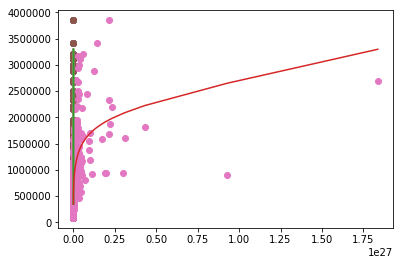

In [200]:

test_x = poly_data_test[test_features[:7]]
test_y = poly_data_test['price']
test_prediction = model[7].predict(test_x)
plt.plot(test_x,test_y,'o',test_x,test_prediction,'-')
test_error = test_prediction -
